In [35]:
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [13]:
numeros = skdata.load_digits()
target = numeros['target']
imagenes = numeros['images']
n_imagenes = len(target)
print(np.shape(imagenes), n_imagenes) # Hay 1797 digitos representados en imagenes 8x8

(1797, 8, 8) 1797


[[ 0.  0.  3. 13. 11.  7.  0.  0.]
 [ 0.  0. 11. 16. 16. 16.  2.  0.]
 [ 0.  4. 16.  9.  1. 14.  2.  0.]
 [ 0.  4. 16.  0.  0. 16.  2.  0.]
 [ 0.  0. 16.  1.  0. 12.  8.  0.]
 [ 0.  0. 15.  9.  0. 13.  6.  0.]
 [ 0.  0.  9. 14.  9. 14.  1.  0.]
 [ 0.  0.  2. 12. 13.  4.  0.  0.]]


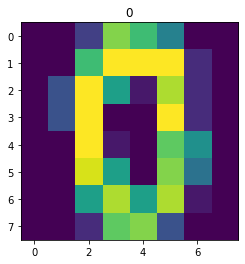

In [20]:
i=20 # este es uno de esos digitos
_ = plt.imshow(imagenes[i])
plt.title('{}'.format(target[i]))
print(imagenes[i])

In [21]:
# para poder correr PCA debemos "aplanar las imagenes"
data = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
print(np.shape(data))

(1797, 64)


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
# Vamos a hacer un split training test
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.5)


In [42]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
# Turn up tolerance for faster convergence
train_samples = int(n_imagenes/2)
#regresión logística sobre los dígitos
clf = LogisticRegression(
    C=50. / train_samples, penalty='l1', solver='saga', tol=0.1)#,multi_class='multinomial'
clf.fit(x_train, y_train)
#predicciones sobre los valores de los dígitos
y_pred=clf.predict(x_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(x_test, y_test)

/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [44]:
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 34.84%
Test score with L1 penalty: 0.9188


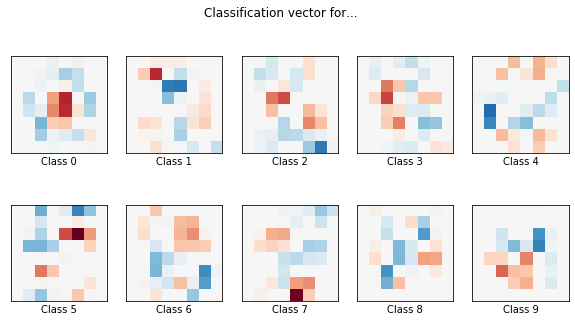

In [45]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(8, 8), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')
plt.savefig("coeficientes.png")

In [46]:
np.shape(coef)

(10, 64)

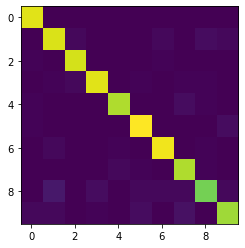

In [49]:
#confusion_matrix(y_true, y_pred)
plt.imshow(confusion_matrix(y_train, y_pred))
plt.savefig("confusion.png")

In [36]:
y_train

array([8, 6, 1, ..., 6, 4, 7])

In [38]:
np.shape()

(1257,)

In [39]:
np.shape(x_train)

(1257, 64)